# Calculating FOM by true information

In [2]:
# import stuff
import sys,os,os.path

#sys.path.append("../../")   # cite IC from parent directory
sys.path.append("/gluster/data/next/software/IC_satkill/")
#sys.path.append("/gluster/data/next/software/IC_sophronia/")
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/gluster/data/next/software/IC_satkill/'

from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import functions as func
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from functions import plot_fit as plot_fit

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

In [3]:
# load in data
pre_dir = '/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/'
folder_paths = [pre_dir + 'PORT_1a/isaura/']
full_tracks = func.collate_ports(folder_paths)



Porting /gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/blobR_voxelS/12_12_18/PORT_1a/isaura/
50
100
150
200
250
300
Done! Tracks available: 87009


In [42]:
# apply cuts
low_e_cut_tracks = full_tracks[full_tracks.energy > 0.05]
event_counts = low_e_cut_tracks['event'].value_counts(sort = False)
low_e_cut_tracks['numb_of_tracks'] = low_e_cut_tracks['event'].map(event_counts)

cut_tracks = func.apply_cuts(low_e_cut_tracks, lower_z = 20, upper_z = 1170, r_lim = 415)
cut_data = cut_tracks[0]

display(cut_tracks[0])
display(cut_tracks[1])

/tmp/ipykernel_2406082/3348694010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_e_cut_tracks['numb_of_tracks'] = low_e_cut_tracks['event'].map(event_counts)


Cutting events around fiducial volume related to:
Z range between 20 and 1170
Radius range < 415
Fiducial track cut
Relative Cut efficiency:
Efficiency: 46.25 %
Absolute Cut efficiency:
Efficiency: 46.25 %
One track cut
Relative Cut efficiency:
Efficiency: 66.41 %
Absolute Cut efficiency:
Efficiency: 60.06 %
Blob overlap cut
Relative Cut efficiency:
Efficiency: 78.67 %
Absolute Cut efficiency:
Efficiency: 70.97 %
Energy cut
Relative Cut efficiency:
Efficiency: 9.66 %
Absolute Cut efficiency:
Efficiency: 6.18 %


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
188,40100,0,1.595531,218.069048,80,7926,1,113.675,174.675,295.790152,...,120.853852,182.054459,309.915059,0.461930,0.348222,0.0,11.090909,11.727273,10.930151,1a
759,40446,0,1.591128,205.163030,77,7425,1,60.675,123.675,139.387795,...,136.440236,213.099171,152.957433,0.289559,0.277047,0.0,12.000000,10.777778,11.680419,1a
934,40556,0,1.589624,189.723962,92,8276,1,120.675,-54.325,219.489178,...,160.713007,17.775126,329.805421,0.474953,0.244921,0.0,11.400000,11.250000,11.533633,1a
1400,60150,0,1.592452,200.726871,83,7772,1,216.675,-116.325,843.936253,...,222.413144,-73.150107,852.317323,0.372783,0.350636,0.0,11.875000,11.615385,11.424532,1a
2037,60518,0,1.595836,324.566001,115,7863,1,33.675,-19.325,541.773094,...,40.185203,203.161270,547.083608,0.348382,0.042899,0.0,10.857143,11.619048,11.585438,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331318,5980040,0,1.554230,191.901751,120,6341,1,-94.325,-270.325,939.417544,...,-88.528446,-229.800289,1081.109264,0.155311,0.083608,0.0,11.222222,10.714286,11.600223,1a
331767,5980310,0,1.596215,205.443468,86,7212,1,207.675,13.675,615.084028,...,226.224423,22.391940,696.206844,0.643214,0.307695,0.0,11.600000,11.333333,10.932190,1a
331779,5980316,0,1.590932,189.697611,81,7624,1,-187.325,133.675,143.734205,...,-180.521157,160.431158,195.043240,0.470923,0.296839,0.0,11.000000,11.714286,11.714009,1a
331880,5980392,0,1.592822,197.374446,69,6908,1,-165.325,-18.325,534.239016,...,-26.837581,22.839927,550.592379,0.386113,0.075311,0.0,11.428571,11.400000,11.567800,1a


,Cut,Relative Efficiency,Relative Events,Single Cut Efficiency
0,No cuts,100.000000,87004,100.000000
1,Fiducial Cuts,46.248448,40238,46.248448
2,One track cut,66.409861,26722,60.061606
3,Blob overlap cuts,78.673004,21023,70.970300
4,Energy cuts,9.660848,2031,6.175578


In [43]:
# collect positrons
posi_dir = '/gluster/data/next/notebooks/john_books/soph_df_data/'
pos_events = pd.read_hdf(posi_dir + 'Tl_signal_true_info.h5')
display(pos_events.head())

,event_id,particle_id,hit_id,x,y,z,time,energy,label
3236,8,52,0,315.166870,208.526917,731.868896,1.128019,0.000005,ACTIVE
3237,8,51,0,315.680695,208.035660,732.565308,0.961651,0.001719,ACTIVE
3238,8,51,1,316.120941,207.520065,733.248108,0.965438,0.001694,ACTIVE
3239,8,51,2,316.652252,206.863007,733.708008,0.969227,0.000674,ACTIVE
3240,8,51,3,316.177185,206.028381,733.763306,0.973017,0.004037,ACTIVE


In [44]:
# select only events in which events have positrons
pos_ids = pos_events['event_id'].unique()*2
sig_data = cut_data[cut_data['event'].isin(pos_ids)]
bck_data = cut_data[~cut_data['event'].isin(pos_ids)]

In [45]:
display(sig_data)
display(bck_data)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
188,40100,0,1.595531,218.069048,80,7926,1,113.675,174.675,295.790152,...,120.853852,182.054459,309.915059,0.461930,0.348222,0.0,11.090909,11.727273,10.930151,1a
934,40556,0,1.589624,189.723962,92,8276,1,120.675,-54.325,219.489178,...,160.713007,17.775126,329.805421,0.474953,0.244921,0.0,11.400000,11.250000,11.533633,1a
1400,60150,0,1.592452,200.726871,83,7772,1,216.675,-116.325,843.936253,...,222.413144,-73.150107,852.317323,0.372783,0.350636,0.0,11.875000,11.615385,11.424532,1a
2037,60518,0,1.595836,324.566001,115,7863,1,33.675,-19.325,541.773094,...,40.185203,203.161270,547.083608,0.348382,0.042899,0.0,10.857143,11.619048,11.585438,1a
2411,120106,0,1.518653,169.823139,87,7887,1,116.675,-36.325,144.858410,...,139.778193,-0.552180,149.360864,0.441120,0.140884,0.0,11.500000,10.571429,11.368784,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330374,5940124,0,1.591008,151.124562,74,7775,1,148.675,187.675,209.094851,...,229.786578,194.946757,251.331428,0.444526,0.355169,0.0,11.125000,11.000000,11.751538,1a
331114,5940560,0,1.596203,125.788075,75,8187,1,185.675,245.675,214.149239,...,244.435423,319.634197,273.489947,0.553067,0.045394,0.0,10.750000,11.428571,10.876430,1a
331767,5980310,0,1.596215,205.443468,86,7212,1,207.675,13.675,615.084028,...,226.224423,22.391940,696.206844,0.643214,0.307695,0.0,11.600000,11.333333,10.932190,1a
331779,5980316,0,1.590932,189.697611,81,7624,1,-187.325,133.675,143.734205,...,-180.521157,160.431158,195.043240,0.470923,0.296839,0.0,11.000000,11.714286,11.714009,1a


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z,PORT
759,40446,0,1.591128,205.163030,77,7425,1,60.675,123.675,139.387795,...,136.440236,213.099171,152.957433,0.289559,0.277047,0.0,12.000000,10.777778,11.680419,1a
2176,60626,0,1.611316,290.490308,111,8191,1,53.675,294.675,908.130300,...,79.366052,366.622281,935.963783,0.518258,0.052053,0.0,11.363636,11.250000,11.966450,1a
2295,120034,0,1.618036,294.214750,94,6332,1,-111.325,10.675,959.406853,...,-80.980435,200.622699,1000.135500,0.279260,0.013003,0.0,10.625000,11.411765,11.620106,1a
2323,120058,0,1.587313,92.416012,78,7088,1,234.675,-140.325,1004.621494,...,258.999731,-72.692588,1010.672841,0.228387,0.192712,0.0,10.428571,10.571429,11.228713,1a
2648,120276,0,1.597746,187.908301,83,6951,1,142.675,201.675,515.459339,...,149.752181,209.706631,542.586229,0.404120,0.081396,0.0,12.000000,11.200000,11.390963,1a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330852,5940390,0,1.513235,302.527329,103,8167,1,77.675,14.675,380.147611,...,209.449195,119.586733,405.154334,0.345805,0.076849,0.0,11.500000,11.200000,11.678604,1a
330982,5940470,0,1.534944,296.198912,108,8519,1,-76.325,-59.325,353.753006,...,53.666972,3.233724,524.779740,0.428354,0.043779,0.0,11.333333,11.666667,11.561689,1a
331049,5940520,0,1.674643,281.564923,107,7713,1,16.675,-341.325,492.116953,...,46.101932,-210.950017,497.184366,0.385469,0.047551,0.0,11.000000,11.500000,11.237620,1a
331318,5980040,0,1.554230,191.901751,120,6341,1,-94.325,-270.325,939.417544,...,-88.528446,-229.800289,1081.109264,0.155311,0.083608,0.0,11.222222,10.714286,11.600223,1a


In [46]:
cut_list = np.linspace(0, 0.5, 51)
fom = func.true_fom_calc(sig_data, bck_data, cut_list)

/gluster/data/next/notebooks/john_books/fom_fitting/functions.py:710: RuntimeWarning: divide by zero encountered in double_scalars
  fom.append(e[i]/np.sqrt(b[i]))
/gluster/data/next/notebooks/john_books/fom_fitting/functions.py:1419: RuntimeWarning: invalid value encountered in double_scalars
  f_error = f*np.sqrt((a_error/a)**2 +(b_error/b)**2)
/gluster/data/next/notebooks/john_books/fom_fitting/functions.py:1439: RuntimeWarning: divide by zero encountered in double_scalars
  element_1 = np.square(a_error/np.sqrt(b))


Text(0, 0.5, 'fom')

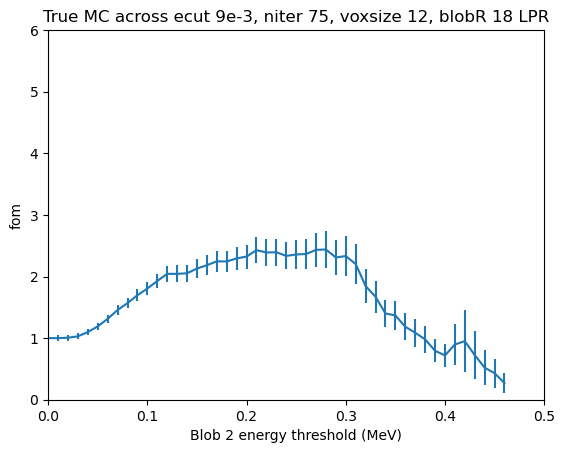

In [47]:
plt.errorbar(cut_list, fom[0], yerr = fom[1])
plt.title("True MC across ecut 9e-3, niter 75, voxsize 12, blobR 18 LPR")
plt.xlabel("Blob 2 energy threshold (MeV)")
plt.xlim([0,0.5])
plt.ylim([0,6])
plt.ylabel("fom")

In [33]:
fom_out = np.nan_to_num(fom[0], posinf = 0)
print(np.max(fom_out))

2.4361114376652266
